In [1]:
import pandas as pd
root_path = '/local/work/merengelke/aipal/'
cities_countries = ['poland', 'rome', 'salamanca', 'sao_paulo', 'turkey', 'buenos_aires']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
df = df[df['age'] > 18]

In [2]:
df

,ID,class,age,WBC_G_L,MCV_fL,MCHC_g_L,Lymphocytes_G_L,Monocytes_G_L,Platelets_G_L,PT_percent,...,prediction.ALL,prediction.AML,prediction.APL,city_country,UPN,Diagnosis,additional.diagnosis.details..lineage.etc,ELN,sex,lineage.details
0,92032414728,AML,27.00000,156.76,89.9,32.4,14.09,24.77,54.0,89.0,...,0.363157,0.572363,0.064480,poland,NaN,NaN,NaN,NaN,NaN,NaN
1,49010708212,ALL,63.00000,2.06,92.5,34.7,1.13,0.73,68.0,85.0,...,0.567479,0.416143,0.016378,poland,NaN,NaN,NaN,NaN,NaN,NaN
2,73082412010,ALL,44.00000,30.79,86.9,34.5,23.86,6.00,48.0,79.0,...,0.320657,0.675332,0.004012,poland,NaN,NaN,NaN,NaN,NaN,NaN
3,76111803144,AML,42.00000,111.04,107.7,32.5,8.01,71.25,35.0,50.0,...,0.019753,0.971936,0.008311,poland,NaN,NaN,NaN,NaN,NaN,NaN
4,87032917494,AML,36.00000,74.17,101.9,32.0,NaN,0.32,68.0,123.0,...,0.833817,0.153072,0.013111,poland,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,112042.0,ALL,31.79452,6.60,84.0,34.0,1.40,0.46,182.0,95.0,...,0.756325,0.233518,0.010156,buenos_aires,NaN,NaN,NaN,NaN,Female,NaN
120,351541.0,ALL,28.86575,13.70,88.0,34.0,4.10,6.00,128.0,92.0,...,0.191563,0.802767,0.005670,buenos_aires,NaN,NaN,NaN,NaN,Female,NaN
121,417217.0,ALL,44.18630,1.07,77.0,33.0,0.34,0.19,39.0,84.0,...,0.655620,0.315089,0.029291,buenos_aires,NaN,NaN,NaN,NaN,Male,NaN
122,707294.0,ALL,52.79178,4.30,83.0,34.0,2.60,0.52,10.0,85.0,...,0.371525,0.618022,0.010453,buenos_aires,NaN,NaN,NaN,NaN,Female,NaN


In [3]:
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True)

In [4]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

In [5]:
# only take rows where class != predicted_class
df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

# df_false.to_excel('all_missclassified.xlsx', index=False)
# df_true.to_excel('all_correctly_classified.xlsx', index=False)


In [6]:
df_true

,ID,class,age,WBC_G_L,MCV_fL,MCHC_g_L,Lymphocytes_G_L,Monocytes_G_L,Platelets_G_L,PT_percent,Fibrinogen_g_L,LDH_UI_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL,city_country,UPN,sex,predicted_class
0,92032414728,AML,27.00000,156.76,89.9,32.4,14.09,24.77,54.0,89.0,1.00,11396.0,15.801225,0.363157,0.572363,0.064480,poland,NaN,NaN,AML
1,49010708212,ALL,63.00000,2.06,92.5,34.7,1.13,0.73,68.0,85.0,3.47,3404.0,35.436893,0.567479,0.416143,0.016378,poland,NaN,NaN,ALL
3,76111803144,AML,42.00000,111.04,107.7,32.5,8.01,71.25,35.0,50.0,3.29,2838.0,64.166066,0.019753,0.971936,0.008311,poland,NaN,NaN,AML
5,55041606230,AML,69.00000,239.80,78.8,27.4,7.80,159.02,98.0,49.0,3.01,2371.0,66.313595,0.037083,0.956900,0.006018,poland,NaN,NaN,AML
6,95042412117,AML,24.00000,245.00,88.9,32.6,9.90,161.78,53.0,46.0,1.89,2254.0,66.032653,0.092618,0.817106,0.090276,poland,NaN,NaN,AML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,839655.0,ALL,56.41918,5.00,87.0,35.0,NaN,NaN,9.0,81.0,215.00,468.0,NaN,0.861619,0.104066,0.034315,buenos_aires,NaN,Female,ALL
115,745336.0,ALL,45.00000,8.80,83.0,34.0,2.80,NaN,37.0,89.0,647.00,428.0,NaN,0.799412,0.186299,0.014289,buenos_aires,NaN,Male,ALL
117,667056.0,ALL,22.70411,17.00,97.0,33.0,2.30,0.51,70.0,59.0,369.00,661.0,3.000000,0.481942,0.475438,0.042620,buenos_aires,NaN,Female,ALL
119,112042.0,ALL,31.79452,6.60,84.0,34.0,1.40,0.46,182.0,95.0,NaN,802.0,6.969697,0.756325,0.233518,0.010156,buenos_aires,NaN,Female,ALL


/tmp/ipykernel_863450/1855253595.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_true, palette='Blues')
/tmp/ipykernel_863450/1855253595.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_true, palette='Greens')
/tmp/ipykernel_863450/1855253595.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_true, palette='Reds')


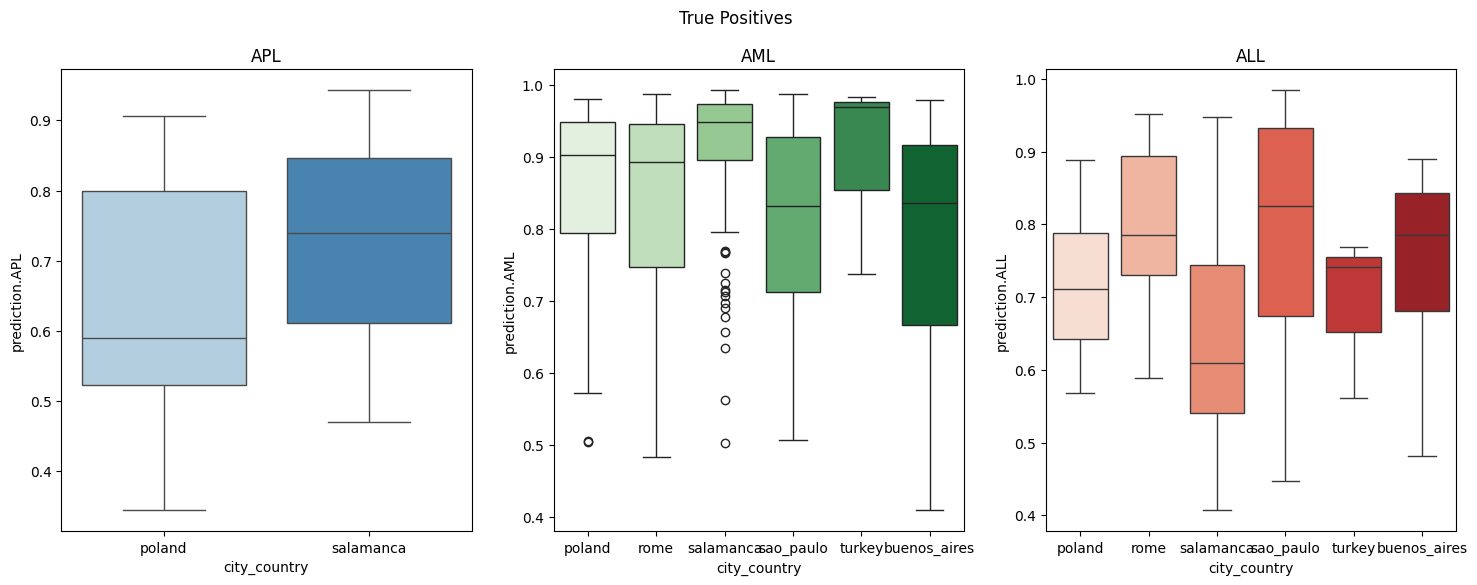

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# APL
apl_true = df_true[df_true['class'] == 'APL']
sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_true, palette='Blues')
axes[0].set_title('APL')

# AML
aml_true = df_true[df_true['class'] == 'AML']
sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_true, palette='Greens')
axes[1].set_title('AML')

# ALL
all_true = df_true[df_true['class'] == 'ALL']
sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_true, palette='Reds')
axes[2].set_title('ALL')

# Set the overall title
fig.suptitle('True Positives')

# Display the plot
plt.show()

/tmp/ipykernel_863450/1678187989.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_false, palette='Blues')
/tmp/ipykernel_863450/1678187989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_false, palette='Greens')
/tmp/ipykernel_863450/1678187989.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_false, palette='Reds')


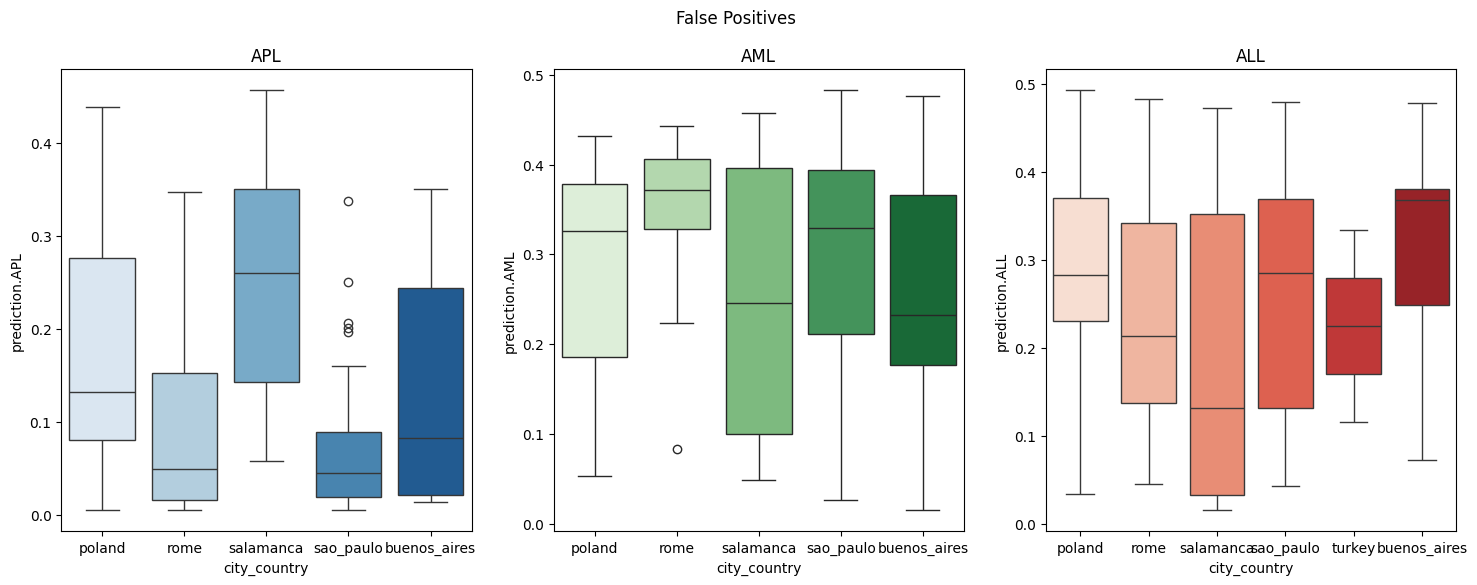

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# APL
apl_false = df_false[df_false['class'] == 'APL']
sns.boxplot(ax=axes[0], x='city_country', y='prediction.APL', data=apl_false, palette='Blues')
axes[0].set_title('APL')

# AML
aml_false = df_false[df_false['class'] == 'AML']
sns.boxplot(ax=axes[1], x='city_country', y='prediction.AML', data=aml_false, palette='Greens')
axes[1].set_title('AML')

# ALL
all_false = df_false[df_false['class'] == 'ALL']
sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_false, palette='Reds')
axes[2].set_title('ALL')

# Set the overall title
fig.suptitle('False Positives')

# Display the plot
plt.show()